### Содержание

1. [Заметки](#Заметки)
2. [Проверка соответствия полей](#Проверка-соответствия-полей)
3. [Сравнение таблиц](#Сравнение-таблиц)
4. [Разбираемся с каноническими транскриптами](#Разбираемся-с-каноническими-транскриптами)
5. [Расчёты для презентации](#Расчёты-для-презентации)
6. [Графики для презентации](#Графики-для-презентации)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from os.path import join

In [19]:
DATA_PATH = "data_dir"

### Заметки

Подсчёт кол-ва строк с PASS в файле 18 хромосомы

In [ ]:
awk '{FS="\t"} $7 ~ "PASS"' data_dir/gnomad.exomes.v4.0.sites.chr18.vcf | wc -l

Разархивировать bgz

In [ ]:
! bgzip -d example.vcf.bgz

Заархивировать, не удаляя исходник

In [ ]:
bgzip -c file_to_compress.vcf > compressed_file.vcf.bgz

### Проверка соответствия полей хэдере с полем vep варианта

Скопируем в переменную значение одного поля vep любого варианта.

In [29]:
variant = '-|frameshift_variant|HIGH|TUBB8B|ENSG00000173213|Transcript|ENST00000308911|protein_coding|4/4||ENST00000308911.9:c.1131_1132del|ENSP00000496713.1:p.Phe378HisfsTer27|1189-1190|1131-1132|377-378|LF/LX|ctCTtc/cttc|1||-1||deletion|HGNC|HGNC:24983|YES|NM_001358689.2|||P1|CCDS86657.1|ENSP00000496713||Ensembl|||CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01163|||||||||HC|||PERCENTILE:0.847940074906367,GERP_DIST:0,BP_DIST:203,DIST_FROM_LAST_EXON:-854,50_BP_RULE:FAIL,ANN_ORF:0,MAX_ORF:0'.split('|')

In [30]:
len(a)

48

В другую переменную запишем хэдер. Уже видим несоответствие в количестве полей (46 != 48).

In [31]:
vep_field_names = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [32]:
len(vep_field_names)

46

Распределим названия полей с их значениями с помощью zip. Видим несоответсвие блиеж к концу:  
* HGVS_OFFSET: CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01
* LoF_flags:
  HC

Всё смещено, значение DOMAINS оказалось в HGVS_OFFSET, а значение LoF -- в LoF_flags

In [34]:
for field_name, value in zip(vep_field_names, variant):
    print(f"{field_name}: {value}")

Allele: -
Consequence: frameshift_variant
IMPACT: HIGH
SYMBOL: TUBB8B
Gene: ENSG00000173213
Feature_type: Transcript
Feature: ENST00000308911
BIOTYPE: protein_coding
EXON: 4/4
INTRON: 
HGVSc: ENST00000308911.9:c.1131_1132del
HGVSp: ENSP00000496713.1:p.Phe378HisfsTer27
cDNA_position: 1189-1190
CDS_position: 1131-1132
Protein_position: 377-378
Amino_acids: LF/LX
Codons: ctCTtc/cttc
ALLELE_NUM: 1
DISTANCE: 
STRAND: -1
FLAGS: 
VARIANT_CLASS: deletion
SYMBOL_SOURCE: HGNC
HGNC_ID: HGNC:24983
CANONICAL: YES
MANE_SELECT: NM_001358689.2
MANE_PLUS_CLINICAL: 
TSL: 
APPRIS: P1
CCDS: CCDS86657.1
ENSP: ENSP00000496713
UNIPROT_ISOFORM: 
SOURCE: Ensembl
DOMAINS: 
miRNA: 
HGVS_OFFSET: CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01163
PUBMED: 
MOTIF_NAME: 
MOTIF_POS: 
HIGH_INF_POS: 
MOTIF_SCORE_CHANGE: 
TRANSCRIPTION_FACTORS: 
LoF: 
LoF_filter: 
LoF_flags: HC
LoF_info: 


Добавим в хэдер два искусственных поля между SOURCE и DOMAINS.

In [15]:
vep_field_names_2 = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|||DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [17]:
len(vep_field_names_2)

48

Значения полей вернулись на свои места.

In [35]:
for field_name, value in zip(vep_field_names_2, variant):
    print(f"{field_name}: {value}")

Allele: -
Consequence: frameshift_variant
IMPACT: HIGH
SYMBOL: TUBB8B
Gene: ENSG00000173213
Feature_type: Transcript
Feature: ENST00000308911
BIOTYPE: protein_coding
EXON: 4/4
INTRON: 
HGVSc: ENST00000308911.9:c.1131_1132del
HGVSp: ENSP00000496713.1:p.Phe378HisfsTer27
cDNA_position: 1189-1190
CDS_position: 1131-1132
Protein_position: 377-378
Amino_acids: LF/LX
Codons: ctCTtc/cttc
ALLELE_NUM: 1
DISTANCE: 
STRAND: -1
FLAGS: 
VARIANT_CLASS: deletion
SYMBOL_SOURCE: HGNC
HGNC_ID: HGNC:24983
CANONICAL: YES
MANE_SELECT: NM_001358689.2
MANE_PLUS_CLINICAL: 
TSL: 
APPRIS: P1
CCDS: CCDS86657.1
ENSP: ENSP00000496713
UNIPROT_ISOFORM: 
SOURCE: Ensembl
: 
: 
DOMAINS: CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01163
miRNA: 
HGVS_OFFSET: 
PUBMED: 
MOTIF_NAME: 
MOTIF_POS: 
HIGH_INF_POS: 
MOTIF_SCORE_CHANGE: 
TRANSCRIPTION_FACTORS: 
LoF: HC
LoF_filter: 
LoF_flags: 
LoF_info: PERCENTILE:0.847940074906367,GERP_DIST:0,BP_D

### Сравнение таблиц

Ниже я проверяла корректность двух парсеров, сравнивая результаты варианта парсера 1 и варианта парсера 2 на одинаковых исходных данных.

In [57]:
comparison_result_cons = my_file_old['Consequence'] == my_file_mods['Consequence']
count_false_cons = len(comparison_result) - comparison_result.sum()
print(count_false_cons)

0


In [58]:
comparison_result = my_file_old['Gene_symbol'] == my_file_mods['Gene_symbol']

count_false = len(comparison_result) - comparison_result.sum()
print(count_false)

0


In [59]:
are_identical = my_file_old.equals(my_file_mods)

print(f"Два датафрейма идентичны: {are_identical}")

Два датафрейма идентичны: False


In [60]:
df_diff = my_file_old.compare(my_file_mods)

# Выводим результат
print("Различия между датафреймами:")
print(df_diff)

Различия между датафреймами:
    LoF_flag                                                   
        self                                              other
82       NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
84       NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
91       NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
94       NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
98       NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
104      NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
105      NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
108      NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
112      NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...
183      NaN  ENST00000308911: HC, NM_001358689.2: HC, NM_00...


In [38]:
my_file_mods.loc[84, 'LoF_flag']

'ENST00000308911: HC, NM_001358689.2: HC, NM_001389609.1: HC, NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC, XM_024451145.1: HC, XM_024451146.1: HC, XM_024451147.1: HC, XM_024451148.1: HC'

In [66]:
my_file_old['LoF_flag'].isna().sum()

218

In [68]:
my_file_mods['LoF_flag'].isna().sum()

208

In [71]:
my_file_mods['LoF_flag'].dropna().nunique()

1

### Разбираемся с каноническими транскриптами

Вынесем в переменные несколько полей vep одного варианта.

In [37]:
a = 'C|synonymous_variant|LOW|TUBB8B|ENSG00000173213|Transcript|ENST00000308911|protein_coding|4/4||ENST00000308911.9:c.1083A>G|ENSP00000496713.1:p.Leu361=|1141|1083|361|L|ctA/ctG|1||-1||SNV|HGNC|HGNC:24983|YES|NM_001358689.2|||P1|CCDS86657.1|ENSP00000496713||Ensembl|||CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:3&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01163||||||||||||'.split('|')

b = 'C|downstream_gene_variant|MODIFIER||ENSG00000282965|Transcript|ENST00000572530|lncRNA||||||||||1|2173|-1||SNV|||YES|||3|||||Ensembl|||||||||||||||'.split('|')

c = 'C|downstream_gene_variant|MODIFIER||ENSG00000262181|Transcript|ENST00000575066|unprocessed_pseudogene||||||||||1|1595|1||SNV|||YES||||||||Ensembl|||||||||||||||'.split('|')

d = 'C|synonymous_variant|LOW|TUBB8B|260334|Transcript|XM_024451148.1|protein_coding|3/3||XM_024451148.1:c.624A>G|XP_024306916.1:p.Leu208=|878|624|208|L|ctA/ctG|1||-1||SNV|EntrezGene|HGNC:24983|YES||||||XP_024306916.1||RefSeq|||||||||||||||'.split('|')

e = 'C|downstream_gene_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753313.1|lncRNA||||||||||1|626|1||SNV|EntrezGene||YES||||||||RefSeq|||||||||||||||'.split('|')

In [38]:
vep_field_names_2 = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|||DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [40]:
data = [a, b, c, d, e]

for item in data:
    print("Consequence:", item[vep_field_names_2.index('Consequence')])
    print("SYMBOL:", item[vep_field_names_2.index('SYMBOL')])
    print("Feature:", item[vep_field_names_2.index('Feature')])
    print("CANONICAL:", item[vep_field_names_2.index('CANONICAL')])
    print()

Consequence: synonymous_variant
SYMBOL: TUBB8B
Feature: ENST00000308911
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: 
Feature: ENST00000572530
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: 
Feature: ENST00000575066
CANONICAL: YES

Consequence: synonymous_variant
SYMBOL: TUBB8B
Feature: XM_024451148.1
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: LOC105371950
Feature: XR_001753313.1
CANONICAL: YES



Варианты без SYMBOL не учитываем, тогда остаётся (в даном примере) для TUBB8B два варианта канонического транскрипта: из Ensemble или RefSeq.  
Останавливаемся на **Ensemble**.

### Расчёты для презентации

In [22]:
df_chr18 = pd.read_table(join(DATA_PATH, "clean_v.4.0_chr18.tsv"))

In [5]:
df_chr18.head()

,Chr,Position,rsID,Ref,Alt,Consequence,Canonical,Gene_symbol,LoF,LoF_flag,LoF_filter
0,chr18,46050,rs744323,C,T,"['ENST00000308911: downstream_gene_variant', '...","ENST00000308911: YES, ENST00000572530: YES, EN...","TUBB8B, LOC105371950",NaN,NaN,NaN
1,chr18,47239,.,TTTA,T,"['ENST00000308911: 3_prime_UTR_variant', 'ENST...","ENST00000308911: YES, ENST00000572530: YES, EN...","TUBB8B, LOC105371950",NaN,NaN,NaN
2,chr18,47242,rs893233952,A,G,"['ENST00000308911: 3_prime_UTR_variant', 'ENST...","ENST00000308911: YES, ENST00000572530: YES, EN...","TUBB8B, LOC105371950",NaN,NaN,NaN
3,chr18,47243,.,T,C,"['ENST00000308911: 3_prime_UTR_variant', 'ENST...","ENST00000308911: YES, ENST00000572530: YES, EN...","TUBB8B, LOC105371950",NaN,NaN,NaN
4,chr18,47245,rs1486723371,A,G,"['ENST00000308911: 3_prime_UTR_variant', 'ENST...","ENST00000308911: YES, ENST00000572530: YES, EN...","TUBB8B, LOC105371950",NaN,NaN,NaN


In [13]:
df_chr18.LoF.unique()[:10]

array([nan,
       'ENST00000308911: HC, NM_001358689.2: HC, NM_001389609.1: HC, NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC, XM_024451145.1: HC, XM_024451146.1: HC, XM_024451147.1: HC, XM_024451148.1: HC',
       'NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC, XM_024451148.1: HC',
       'ENST00000308911: HC, NM_001358689.2: HC, NM_001389609.1: HC, XM_024451145.1: HC, XM_024451146.1: HC, XM_024451147.1: HC',
       'ENST00000308911: HC, NM_001358689.2: HC, NM_001389609.1: HC, XM_024451145.1: HC, XM_024451146.1: HC',
       'NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC',
       'NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC, XM_024451147.1: LC, XM_024451148.1: LC',
       'XM_024451146.1: HC, XM_024451147.1: LC, XM_024451148.1: LC',
       'XM_024451146.1: HC',
       'ENST00000308911: HC, NM_001358689.2: HC, NM_001389609.1: HC, NM_001389610.1: HC, XM_024451143.1: HC, XM_024451144.1: HC, XM_024451145.1: HC'],
      dtype=object)

In [15]:
df_chr18.LoF_flag.unique()[:10]

array([nan,
       'ENST00000261601: NO_EXON_NUMBER, ENST00000400266: NO_EXON_NUMBER, NM_005151.4: NO_EXON_NUMBER',
       'ENST00000261600: NON_CAN_SPLICE, ENST00000579891: NON_CAN_SPLICE, ENST00000631280: NON_CAN_SPLICE, NM_005131.3: NON_CAN_SPLICE, XM_011525772.3: NON_CAN_SPLICE, XM_011525773.1: NON_CAN_SPLICE, XM_011525774.2: NON_CAN_SPLICE, XM_024451292.1: NON_CAN_SPLICE',
       'ENST00000631280: PHYLOCSF_UNLIKELY_ORF',
       'ENST00000400256: PHYLOCSF_WEAK',
       'ENST00000327228: SINGLE_EXON, NM_004066.3: SINGLE_EXON',
       'ENST00000540035: PHYLOCSF_WEAK, ENST00000620089: PHYLOCSF_WEAK',
       'ENST00000540035: NO_EXON_NUMBER, ENST00000579912: NO_EXON_NUMBER, ENST00000581619: NO_EXON_NUMBER, ENST00000620089: NO_EXON_NUMBER, XM_005258103.3: NO_EXON_NUMBER, XM_011525648.3: NO_EXON_NUMBER, XM_011525649.1: NO_EXON_NUMBER, XM_011525651.2: NO_EXON_NUMBER, XM_017025707.1: NO_EXON_NUMBER',
       'ENST00000338387: PHYLOCSF_WEAK, ENST00000400606: PHYLOCSF_WEAK, ENST00000540035: P

In [14]:
df_chr18.LoF_filter.unique()[:10]

array([nan, 'XM_024451147.1: 5UTR_SPLICE, XM_024451148.1: 5UTR_SPLICE',
       'NM_001389609.1: 5UTR_SPLICE, XM_024451145.1: 5UTR_SPLICE',
       'NM_001389609.1: 5UTR_SPLICE, NM_001389610.1: 5UTR_SPLICE, XM_024451144.1: 5UTR_SPLICE',
       'ENST00000580410: 5UTR_SPLICE',
       'ENST00000580410: 5UTR_SPLICE, ENST00000581983: 5UTR_SPLICE',
       'ENST00000631280: 3UTR_SPLICE', 'XM_011525773.1: 5UTR_SPLICE',
       'NM_001393346.1: 5UTR_SPLICE',
       'ENST00000579912: 5UTR_SPLICE, NM_001393345.1: 5UTR_SPLICE'],
      dtype=object)

Посмотрим, сколько всего строк с **pLoF**-ами:

In [41]:
# count_consq = df_chr18[df_chr18['Consequence'].\
#               str.contains('stop_gained|splice_donor|splice_acceptor|frameshift')].\
#               shape[0]

count_consq = df_chr18[df_chr18['Consequence'].\
              str.contains('stop_gained|splice_donor|splice_acceptor|frameshift|transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation')].\
              shape[0]

print("Общее число pLoF:", count_consq)


Общее число pLoF: 35502


In [25]:
# count_consq_wo_flags = len(df_chr18[(df_chr18['Consequence'].\
#                        str.contains('stop_gained|splice_donor|splice_acceptor|frameshift')) & \
#                        (df_chr18['LoF_flag'].isnull())])

count_consq_wo_flags = len(df_chr18[(df_chr18['Consequence'].str.contains('stop_gained|splice_donor|splice_acceptor|frameshift|transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation')) & \
                       (df_chr18['LoF_flag'].isnull())])

print("Общее число pLoF без LoF флагов:", count_consq_wo_flags)


Общее число pLoF (stop_gained, splice_donor, splice_acceptor, frameshift) без LoF флагов: 31032


In [26]:
total_count = df_chr18.shape[0]
per_lof = round(count_consq * 100 / total_count, 1)
per_lof_wo_flags = round(count_consq_wo_flags * 100 / total_count, 1)

print(f"Итого в файле 18 хромосомы содержится {per_lof}% LoF всего, из них {per_lof_wo_flags}% не содержат LoF флагов.")


Итого в файле 18 хромосомы содержится 3.2% LoF всего, из них 2.8% не содержат LoF флагов.


Вытащила только **уникальные названия в колонках**, чтобы было проще строить графики

In [59]:
df_uniqs = pd.read_table(join(DATA_PATH, "uniqs.tsv"))

In [60]:
df_uniqs.head()

,Chr,Position,rsID,Ref,Alt,Consequence,Impact,Gene_symbol,LoF,LoF_flag,LoF_filter
0,chr18,46050,rs744323,C,T,"downstream_gene_variant, intron_variant&non_co...",MODIFIER,"TUBB8B, LOC105371950",NaN,NaN,NaN
1,chr18,47239,.,TTTA,T,"downstream_gene_variant, 3_prime_UTR_variant",MODIFIER,"TUBB8B, LOC105371950",NaN,NaN,NaN
2,chr18,47242,rs893233952,A,G,"downstream_gene_variant, 3_prime_UTR_variant",MODIFIER,"TUBB8B, LOC105371950",NaN,NaN,NaN
3,chr18,47243,.,T,C,"downstream_gene_variant, 3_prime_UTR_variant",MODIFIER,"TUBB8B, LOC105371950",NaN,NaN,NaN
4,chr18,47245,rs1486723371,A,G,"downstream_gene_variant, 3_prime_UTR_variant",MODIFIER,"TUBB8B, LOC105371950",NaN,NaN,NaN


In [66]:
count_consq_uniqs = df_uniqs[df_uniqs['Consequence'].\
              str.contains('stop_gained|splice_donor|splice_acceptor|frameshift')].\
              shape[0]

count_consq_uniqs == count_consq

True

In [67]:
count_consq_wo_flags_uniqs = len(df_uniqs[(df_uniqs['Consequence'].\
                       str.contains('stop_gained|splice_donor|splice_acceptor|frameshift')) & \
                       (df_uniqs['LoF_flag'].isnull())])

count_consq_wo_flags_uniqs == count_consq_wo_flags

True

In [68]:
df_uniqs.Consequence.nunique()

15410

### Графики для презентации

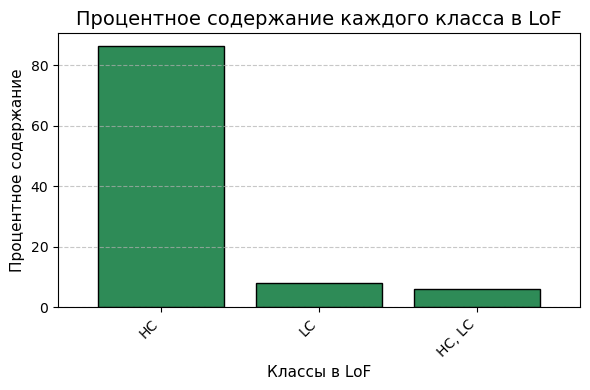

In [73]:
# График для уникальных значений в столбце LoF

counts_LoF = df_uniqs['LoF'].value_counts()
percentages_LoF = counts_LoF / counts_LoF.sum() * 100

plt.figure(figsize=(6, 4))
percentages_LoF.plot(kind='bar', color='seagreen', edgecolor='black', width=0.8)
plt.title('Процентное содержание каждого класса в LoF', fontsize=14)
plt.xlabel('Классы в LoF', fontsize=11)
plt.ylabel('Процентное содержание', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


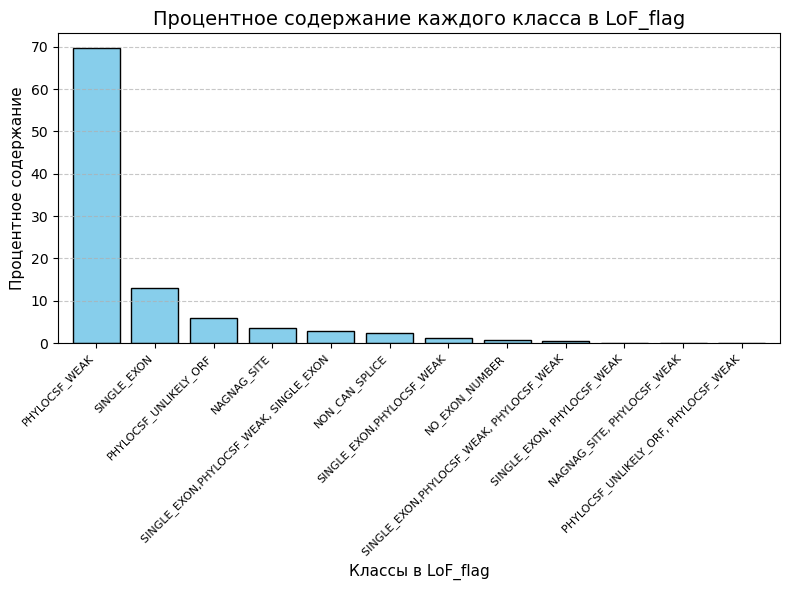

In [72]:
# График для уникальных значений в столбце LoF_flag

counts_LoF_flag = df_uniqs['LoF_flag'].value_counts()
percentages_LoF_flag = counts_LoF_flag / counts_LoF_flag.sum() * 100

plt.figure(figsize=(8, 6))
percentages_LoF_flag.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
plt.title('Процентное содержание каждого класса в LoF_flag', fontsize=14)
plt.xlabel('Классы в LoF_flag', fontsize=11)
plt.ylabel('Процентное содержание', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


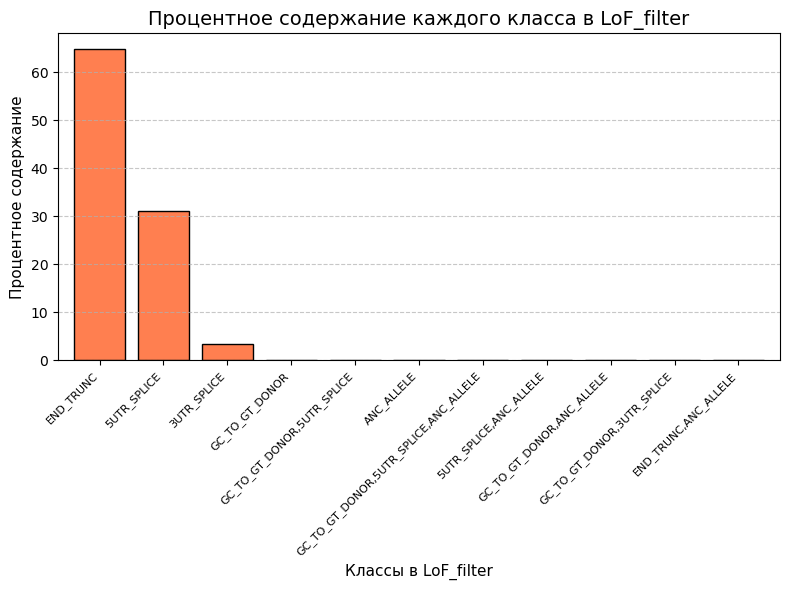

In [78]:
# График для уникальных значений в столбце LoF_filter

counts_LoF_filter = df_uniqs['LoF_filter'].value_counts()
percentages_LoF_flag = counts_LoF_filter / counts_LoF_filter.sum() * 100

plt.figure(figsize=(8, 6))
percentages_LoF_filter.plot(kind='bar', color='coral', edgecolor='black', width=0.8)
plt.title('Процентное содержание каждого класса в LoF_filter', fontsize=14)
plt.xlabel('Классы в LoF_filter', fontsize=11)
plt.ylabel('Процентное содержание', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [77]:
df_uniqs.Impact.nunique()

27

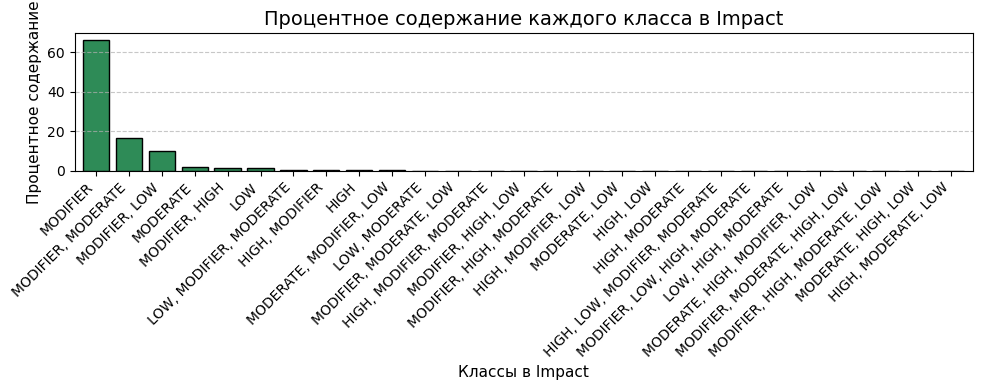

In [161]:
# График для уникальных значений в столбце Impact

counts_Impact = df_uniqs['Impact'].value_counts()
percentages_Impact = counts_Impact / counts_Impact.sum() * 100

plt.figure(figsize=(10, 4))
percentages_Impact.plot(kind='bar', color='seagreen', edgecolor='black', width=0.8)
plt.title('Процентное содержание каждого класса в Impact', fontsize=14)
plt.xlabel('Классы в Impact', fontsize=11)
plt.ylabel('Процентное содержание', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [162]:
vep_consequences = [
    "transcript_ablation",
    "splice_acceptor_variant",
    "splice_donor_variant",
    "stop_gained",
    "frameshift_variant",
    "stop_lost",
    "start_lost",
    "transcript_amplification",
    "feature_elongation",
    "feature_truncation",
    "inframe_insertion",
    "inframe_deletion",
    "missense_variant",
    "protein_altering_variant",
    "splice_donor_5th_base_variant",
    "splice_region_variant",
    "splice_donor_region_variant",
    "splice_polypyrimidine_tract_variant",
    "incomplete_terminal_codon_variant",
    "start_retained_variant",
    "stop_retained_variant",
    "synonymous_variant",
    "coding_sequence_variant",
    "mature_miRNA_variant",
    "5_prime_UTR_variant",
    "3_prime_UTR_variant",
    "non_coding_transcript_exon_variant",
    "intron_variant",
    "NMD_transcript_variant",
    "non_coding_transcript_variant",
    "coding_transcript_variant",
    "upstream_gene_variant",
    "downstream_gene_variant",
    "TFBS_ablation",
    "TFBS_amplification",
    "TF_binding_site_variant",
    "regulatory_region_ablation",
    "regulatory_region_amplification",
    "regulatory_region_variant",
    "intergenic_variant",
    "sequence_variant"
]

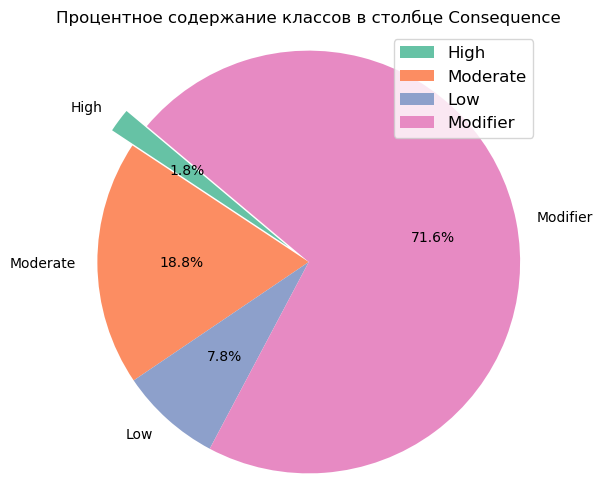

In [185]:
high = ["transcript_ablation", "splice_acceptor_variant", "splice_donor_variant", "stop_gained",
          "frameshift_variant", "stop_lost", "start_lost", "transcript_amplification", "feature_elongation",
          "feature_truncation"]

moderate = ["inframe_insertion", "inframe_deletion", "missense_variant", "protein_altering_variant"]

low = ["splice_donor_5th_base_variant", "splice_region_variant", "splice_donor_region_variant",
          "splice_polypyrimidine_tract_variant", "incomplete_terminal_codon_variant", "start_retained_variant",
          "stop_retained_variant", "synonymous_variant"]

modifier = ["coding_sequence_variant", "mature_miRNA_variant", "5_prime_UTR_variant", "3_prime_UTR_variant",
          "non_coding_transcript_exon_variant", "intron_variant", "NMD_transcript_variant",
          "non_coding_transcript_variant", "coding_transcript_variant", "upstream_gene_variant",
          "downstream_gene_variant", "TFBS_ablation", "TFBS_amplification", "TF_binding_site_variant",
          "regulatory_region_ablation", "regulatory_region_amplification", "regulatory_region_variant",
          "intergenic_variant", "sequence_variant"]


impact_counts = [(df_uniqs['Consequence'].isin(high)).sum(),
                  (df_uniqs['Consequence'].isin(moderate)).sum(),
                  (df_uniqs['Consequence'].isin(low)).sum(),
                  (df_uniqs['Consequence'].isin(modifier)).sum()]

total_rows = df_uniqs.shape[0]

impact_percentages = []
for count in impact_counts:
    percentage = count / total_rows * 100
    impact_percentages.append(percentage)

categories = ['High', 'Moderate', 'Low', 'Modifier']
explode = [0.12, 0, 0, 0]

plt.figure(figsize=(6, 6))
plt.pie(impact_percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'), explode=explode)
plt.title('Процентное содержание классов в столбце Consequence', fontsize=12)
plt.axis('equal')
plt.legend(categories, loc='upper right', fontsize=12)
plt.show()


Или можно выделить нужный сектор пунктирами:

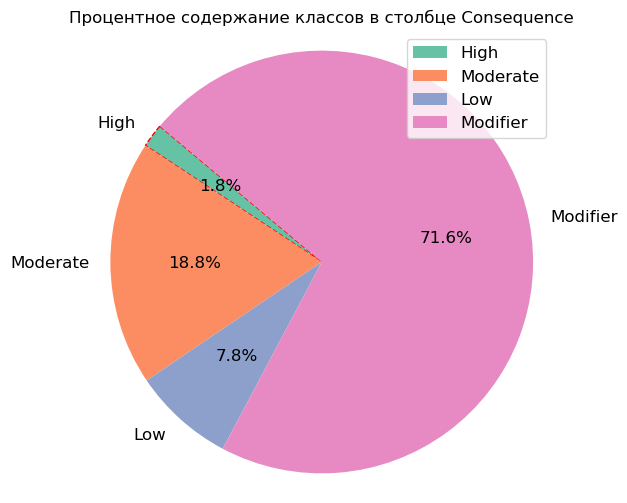

In [187]:
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(impact_percentages, labels=categories, autopct='%1.1f%%', startangle=140,
                                    colors=sns.color_palette('Set2'), textprops={'fontsize': 12})
plt.title('Процентное содержание классов в столбце Consequence', fontsize=12)
plt.axis('equal')
plt.legend(categories, loc='upper right', fontsize=12)

for w in wedges:
    if w.get_label() == 'High':
        w.set_linestyle('--')
        w.set_edgecolor('red')
        
plt.show()
